In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
import pickle
from matplotlib.backends.backend_pdf import PdfPages
from os import mkdir
from os.path import isdir
rcParams = {'font.size': 20 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)

data_dir = '/Users/harihara/Research-Activities/Data/SCRAPT/Lupus-Microbiome-Published/'

colors = ['#ff7f00','#f781bf','#377eb8', '#a65628', '#4daf4a','#aa3377','#000000']
alpha = [0.1,0.5, 1.0, 5.0, 10.0]
keys = ['Adaptive_With_Modeshifting',  'Adaptive_Without_Modeshifting', 
        'Fixed_With_Modeshifting',  'Fixed_Without_Modeshifting','DNACLUST', 'CDHIT', 'UCLUST']
titles = ['Adaptive Sampling + \n Mode-Shifting (SCRAPT)', 'Adaptive Sampling \n Without Mode-Shifting',
          'Fixed Sampling + \n Mode-Shifting (Naive)', 'Fixed Sampling \n Without Mode-Shifting',
          'DNACLUST', 'CDHIT', 'UCLUST']
out_path = '/Users/harihara/Research-Activities/Plots/Iterative_Clustering/Lupus-Microbiome-Published/'
if not isdir(out_path):
    mkdir(out_path)

In [62]:
s = 0.95
sim = pickle.load(open(data_dir+'/sim_'+str(s)+'.pkl', "rb"))
n = 980180 
times = {0.99:19, 0.98:13, 0.97:8, 0.96:5, 0.95:4}
#n = 1773145
#times = {0.99:36, 0.98:32, 0.97:20, 0.96:13, 0.95:12}
print(sim.keys())
pdf = PdfPages(out_path+'/sim_'+str(s)+'.pdf')

dict_keys(['DNACLUST', 5.0, 10.0, 0.5, 1.0, 0.1, 'CDHIT', 'UCLUST'])


Plot the Number of sequences clustered in each iteration for SCRAPT

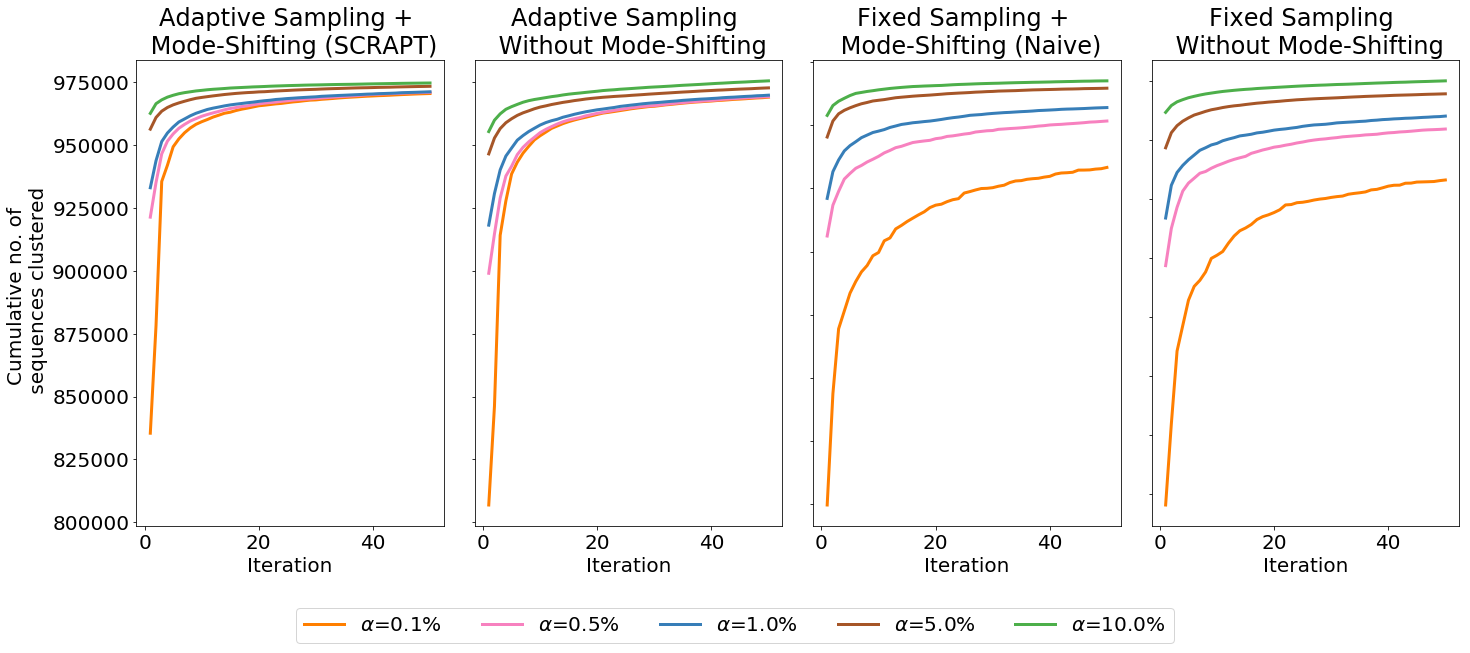

In [63]:
plt.rcParams.update(rcParams)

fig,ax = plt.subplots(1,4,figsize = (21,9))
for i in range(4):
    for j in range(len(alpha)):
        ax[i].plot(np.cumsum(sim[alpha[j]][keys[i]]['Cluster_Summary']['Seq_Counts']), color = colors[j], 
                label = r'$\alpha$='+str(alpha[j])+'%', linewidth=3)    
    if i> 0: ax[i].set_yticklabels([])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Iteration')
ax[0].set_ylabel('Cumulative no. of \n sequences clustered')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol = 5)

ylim = ax[1].get_ylim()
ax[0].set_ylim(list(ylim))

plt.subplots_adjust(left = 0.1, right = 0.975, bottom = 0.2, top = 0.92, wspace = 0.1)

pdf.savefig(fig)

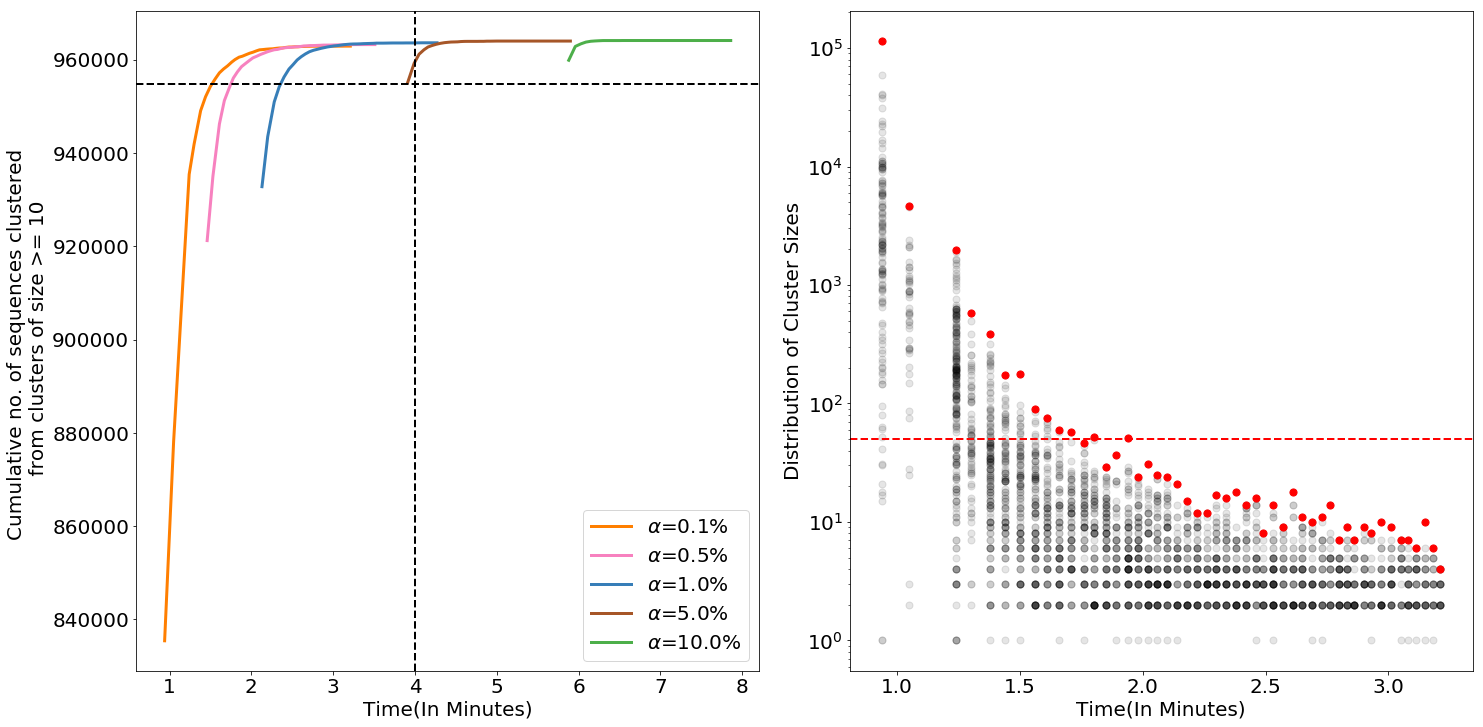

In [64]:
fig,ax = plt.subplots(1,2,figsize = (21,10.5))

for j in range(len(alpha)):
    ax[0].plot(np.cumsum(sim[alpha[j]][keys[0]]['Cluster_Summary']['Time(Total)']),
               np.cumsum(sim[alpha[j]][keys[0]]['Cluster_Summary']['Seqs_in_Cluster_Above_10']), 
               color = colors[j], label = r'$\alpha$='+str(alpha[j])+'%', linewidth=3)
ax[0].set_xlabel('Time(In Minutes)')
ax[0].set_ylabel('Cumulative no. of sequences clustered \n from clusters of size >= 10')
ax[0].legend()
t = np.array(sim['DNACLUST']['Clusters'])
t = t[t>=10]
ax[0].axvline(times[s], linewidth = 2, color = 'black', linestyle = '--')
ax[0].axhline(t.sum(), linewidth = 2, color = 'black', linestyle = '--')
ax[0].legend()

df_1 = sim[0.1]['Adaptive_With_Modeshifting']['Clusters'].set_index('Iteration')
df_2 = sim[0.1]['Adaptive_With_Modeshifting']['Cluster_Summary'].cumsum()
df_temp = df_1.join(df_2[['Time(Total)']])
df_temp.plot.scatter('Time(Total)', 'Density', alpha = 0.1, ax = ax[1], color = 'black', s = 50)
df_temp.reset_index().groupby('Iteration').max().plot.scatter('Time(Total)', 'Density', alpha = 1, 
                                                              ax = ax[1], color = 'red', s = 50)
ax[1].axhline(50, color = 'red', linestyle = '--', linewidth = 2)
ax[1].set_yscale('log')
ax[1].set_xlabel('Time(In Minutes)')
ax[1].set_ylabel('Distribution of Cluster Sizes')
fig.tight_layout()
pdf.savefig(fig)

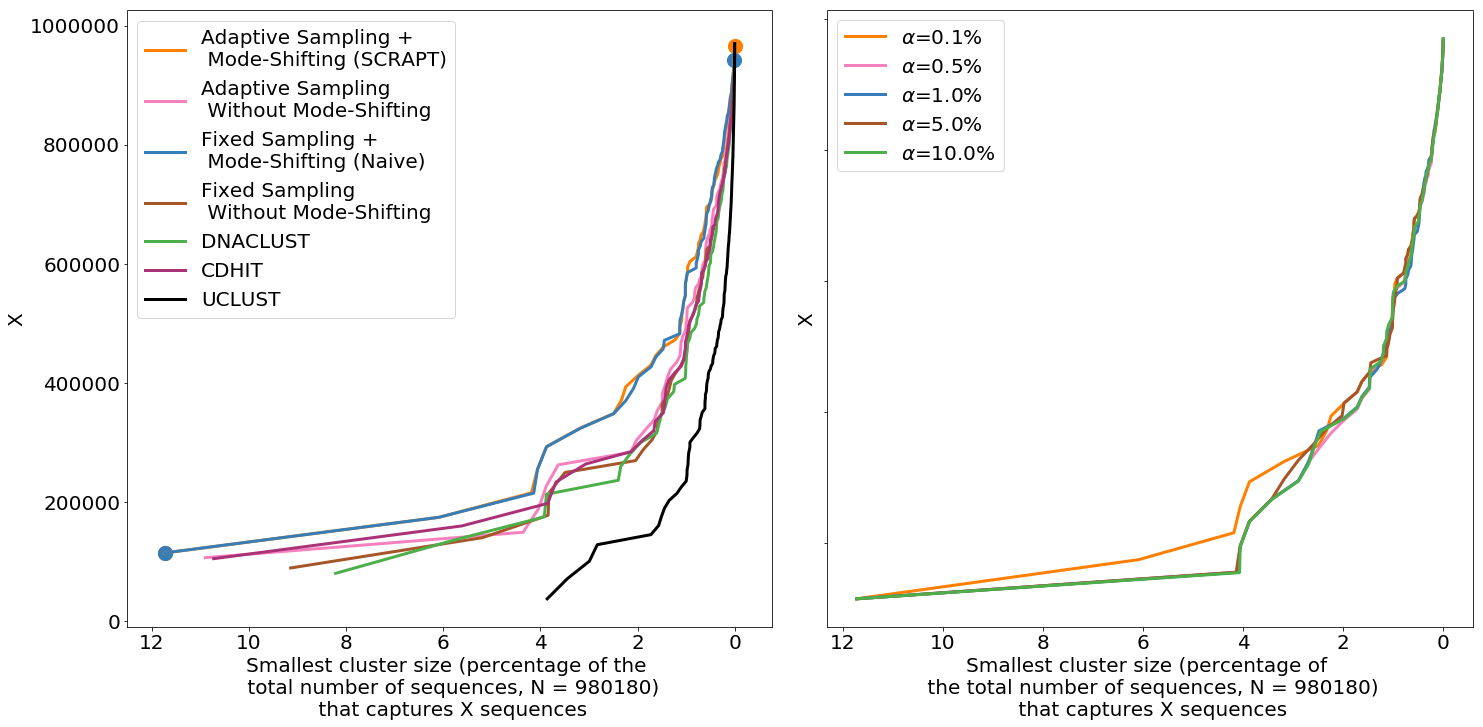

In [65]:
fig, ax = plt.subplots(1,2,figsize = (21,10.5))

for i in range(len(keys)):
    a = alpha[0]
    
    if keys[i] != 'DNACLUST' and keys[i] != 'UCLUST' and keys[i] != 'CDHIT':
        ax[0].plot(np.array(sim[a][keys[i]]['Fragmentation_Measure'][1])/n*100.0,
                   sim[a][keys[i]]['Fragmentation_Measure'][0], color = colors[i], label = titles[i], linewidth=3)
    try:               
        if keys[i] == 'DNACLUST' or keys[i] == 'UCLUST' or keys[i] == 'CDHIT':
            ax[0].plot(np.array(sim[keys[i]]['Fragmentation_Measure'][1])/n*100.0,
                       sim[keys[i]]['Fragmentation_Measure'][0], color = colors[i], label = titles[i], linewidth=3)
    except KeyError:
        pass
try:    
    ax[0].scatter(np.array(sim[a][keys[0]]['Fragmentation_Measure'][1][-1])/n*100.0,
                  sim[a][keys[0]]['Fragmentation_Measure'][0][-1], color = colors[0], s = 200)
    ax[0].scatter(np.array(sim[a][keys[0]]['Fragmentation_Measure'][1][0])/n*100.0,
                  sim[a][keys[0]]['Fragmentation_Measure'][0][0], color = colors[0], s = 200)  

    ax[0].scatter(np.array(sim[a][keys[2]]['Fragmentation_Measure'][1][-1])/n*100.0,
                  sim[a][keys[2]]['Fragmentation_Measure'][0][-1], color = colors[2], s = 200)
    ax[0].scatter(np.array(sim[a][keys[2]]['Fragmentation_Measure'][1][0])/n*100.0,
                  sim[a][keys[2]]['Fragmentation_Measure'][0][0], color = colors[2], s = 200)  
except KeyError:
    pass

ax[0].set_xlim(ax[0].get_xlim()[::-1])
ax[0].legend()
ax[0].set_ylabel('X')
ax[0].set_xlabel('Smallest cluster size (percentage of the \n total number of sequences, N = '+str(n)+
              ')\n that captures X sequences')

for i in range(len(alpha)):
    a = alpha[i]
    ax[1].plot(np.array(sim[a][keys[0]]['Fragmentation_Measure'][1])/n*100.0,
               sim[a][keys[0]]['Fragmentation_Measure'][0], color = colors[i],label = r'$\alpha$='+str(a)+'%', 
               linewidth=3)


ax[1].set_yticklabels([])
ax[1].set_xlim(ax[1].get_xlim()[::-1])
ax[1].legend()
ax[1].set_ylabel('X')
ax[1].set_xlabel('Smallest cluster size (percentage of \n the total number of sequences, N = '+str(n)+
              ')\n that captures X sequences')
fig.tight_layout()
pdf.savefig(fig)

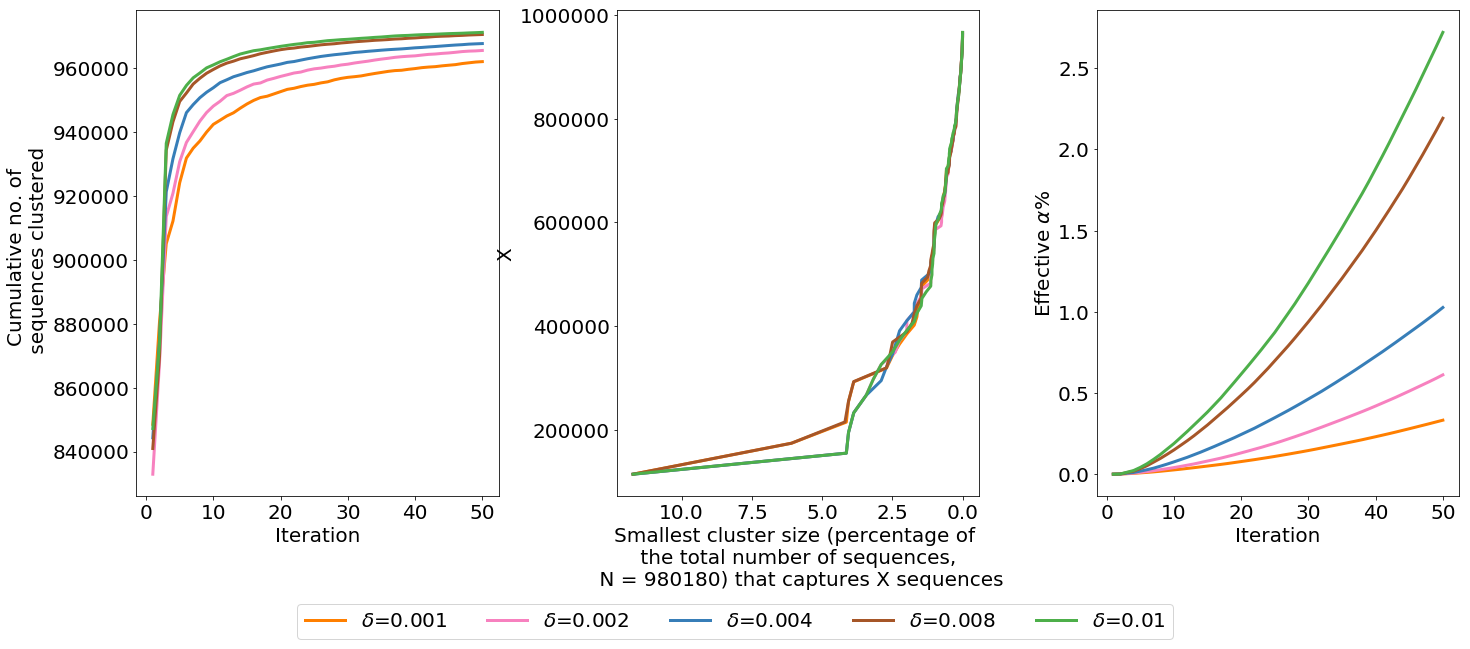

In [66]:
fig, ax = plt.subplots(1,3, figsize = (21, 9))
delta = ['0.001','0.002','0.004','0.008','0.01']
a = alpha[0]

for i in range(len(delta)):
    d = delta[i]
    ax[0].plot(np.cumsum(sim[a]['delta_'+d]['Cluster_Summary']['Seq_Counts']), 
               color = colors[i], label = r'$\delta$='+str(d), linewidth=3)
    ax[1].plot(np.array(sim[a]['delta_'+d]['Fragmentation_Measure'][1])/n*100.0,
               np.array(sim[a]['delta_'+d]['Fragmentation_Measure'][0]),
               color = colors[i], label = r'$\delta$='+str(d), linewidth=3)
    ax[2].plot(np.cumsum(sim[a]['delta_'+d]['Cluster_Summary']['Sampling Rate']), 
               color = colors[i], label = r'$\delta$='+str(d), linewidth=3)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol = 5)
ax[0].set_xlabel('Iteration')
ax[1].set_xlabel('Smallest cluster size (percentage of \n the total number of sequences, \n N = '+str(n)+
                 ') that captures X sequences')
ax[2].set_xlabel('Iteration')

ax[0].set_ylabel('Cumulative no. of \n sequences clustered')
ax[1].set_ylabel('X')
ax[2].set_ylabel('Effective '+r'$\alpha$%')
ax[1].set_xlim(ax[1].get_xlim()[::-1])

plt.subplots_adjust(left = 0.1, right = 0.975, bottom = 0.24, top = 0.99, wspace = 0.325)
pdf.savefig(fig)

In [67]:
pdf.close()